In [11]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
CONTENT_PATH = '/home/rkruger/Doutorado'

In [13]:
class ExperimentParameters:
    epochs = 0
    dataset_length = 0
    training_ratio = 0.0
    training_length = 0
    testing_length = 0
    ring_dimension = 0
    multiplicative_depth = 0
    encrypting_time = 0.0
    training_time = 0.0
    testing_time = 0.0

In [14]:
def read_parameters(parameters_file_path):
    params = ExperimentParameters()

    with open(parameters_file_path, 'r') as f:
        for line in f:
            l_splitted_line = line.split('=')
            l_param_name = l_splitted_line[0].strip()
            l_param_value = l_splitted_line[1].strip()

            match l_param_name:
                case 'epochs':
                    params.epochs = int(l_param_value)

                case 'datasetLength':
                    params.dataset_length = int(l_param_value)

                case 'trainingRatio':
                    params.training_ratio = float(l_param_value)

                case 'trainingLength':
                    params.training_length = int(l_param_value)

                case 'testingLength':
                    params.testing_length = int(l_param_value)

                case 'ringDimension':
                    params.ring_dimension = int(l_param_value)

                case 'multiplicativeDepth':
                    params.multiplicative_depth = int(l_param_value)

                case 'encryptingTime':
                    params.encrypting_time = float(l_param_value)

                case 'trainingTime':
                    params.training_time = float(l_param_value)

                case 'testingTime':
                    params.testing_time = float(l_param_value)

    return params

In [15]:
def read_experiment_data(p_exp_folder, p_crypto_scheme, p_algorithm, p_activation, p_epochs, p_metrics):
    df_predictions = pd.read_csv(f'{p_exp_folder}/predictions.csv', header=None, names=['real', 'predicted'])
    y_true = df_predictions['real']
    y_pred = df_predictions['predicted']

    l_accuracy = accuracy_score(y_true, y_pred)
    l_precision = precision_score(y_true, y_pred)
    l_recall = recall_score(y_true, y_pred)
    l_f1_score = f1_score(y_true, y_pred)

    if os.path.isfile(f'{p_exp_folder}/parameters.csv'):
        l_exp_params = read_parameters(f'{p_exp_folder}/parameters.csv')
        l_training_time = l_exp_params.training_time
        l_testing_time = l_exp_params.testing_time
    else:
        l_training_time = 0.0
        l_testing_time = 0.0

    l_metric = [p_crypto_scheme, p_algorithm, p_activation, p_epochs, l_accuracy, l_precision, l_recall,
                l_f1_score, l_training_time, l_testing_time]

    p_metrics.append(l_metric)

In [16]:
l_metrics = []

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/ckks_tanh_{epoch_id}'
    read_experiment_data(l_exp_folder, 'CKKS', 'Perceptron', 'tanh', epoch_id, l_metrics)

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/ckks_sigmoid_{epoch_id}'
    read_experiment_data(l_exp_folder, 'CKKS', 'Perceptron', 'sigmoid', epoch_id, l_metrics)

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/plain_tanh_{epoch_id}'
    read_experiment_data(l_exp_folder, 'Plain', 'Perceptron', 'tanh', epoch_id, l_metrics)

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/plain_sigmoid_{epoch_id}'
    read_experiment_data(l_exp_folder, 'Plain', 'Perceptron', 'sigmoid', epoch_id, l_metrics)

df_metrics = pd.DataFrame(l_metrics,
                          columns=['Crypto Scheme', 'Algorithm', 'Activation', 'Epochs', 'Accuracy',
                                   'Precision', 'Recall', 'F1-score', 'Training Time', 'Testing Time'])
df_metrics

,Crypto Scheme,Algorithm,Activation,Epochs,Accuracy,Precision,Recall,F1-score,Training Time,Testing Time
0,CKKS,Perceptron,tanh,1,0.587719,0.000000,0.000000,0.000000,185.473347,79.123217
1,CKKS,Perceptron,tanh,2,0.619883,0.000000,0.000000,0.000000,375.435882,79.145891
2,CKKS,Perceptron,tanh,3,0.897661,0.753521,1.000000,0.859438,569.177848,79.816412
3,CKKS,Perceptron,tanh,4,0.921053,0.798507,1.000000,0.887967,753.961340,79.334675
4,CKKS,Perceptron,tanh,5,0.894737,0.748252,1.000000,0.856000,942.966423,79.061015
5,CKKS,Perceptron,tanh,6,0.909357,0.775362,1.000000,0.873469,1129.021691,78.238470
6,CKKS,Perceptron,tanh,7,0.891813,0.743056,1.000000,0.852590,1326.292112,78.971514
7,CKKS,Perceptron,tanh,8,0.897661,0.753521,1.000000,0.859438,1507.361312,79.654457
8,CKKS,Perceptron,tanh,9,0.900585,0.758865,1.000000,0.862903,1695.652830,79.543126
9,CKKS,Perceptron,tanh,10,0.897661,0.753521,1.000000,0.859438,1893.110462,79.356135


In [17]:
sns.set_theme(style="ticks", palette="Spectral")

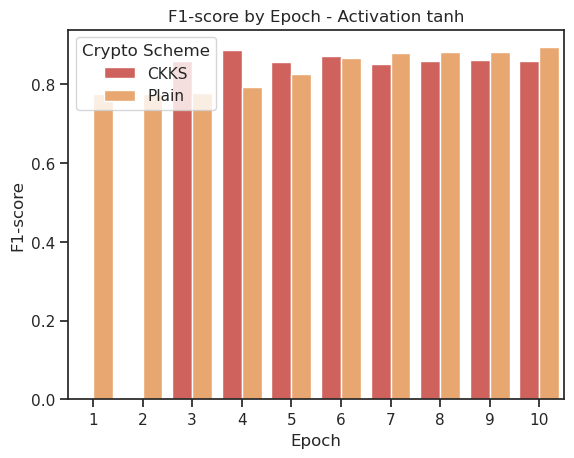

In [18]:
filtered_df = df_metrics[df_metrics['Activation'] == 'tanh']
sns.barplot(data=filtered_df, x='Epochs', hue='Crypto Scheme', y='F1-score')
plt.title("F1-score by Epoch - Activation tanh")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

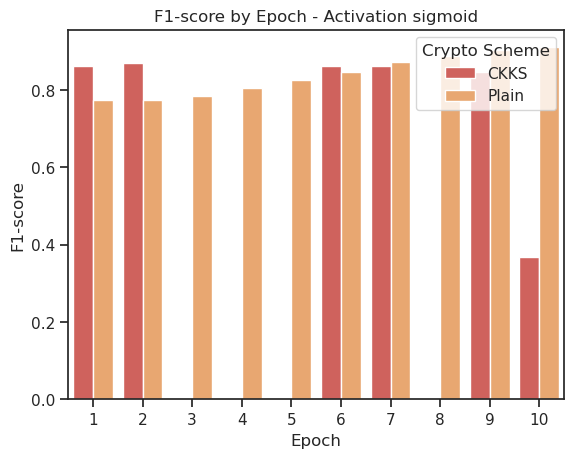

In [19]:
filtered_df = df_metrics[df_metrics['Activation'] == 'sigmoid']
sns.barplot(data=filtered_df, x='Epochs', hue='Crypto Scheme', y='F1-score')
plt.title("F1-score by Epoch - Activation sigmoid")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

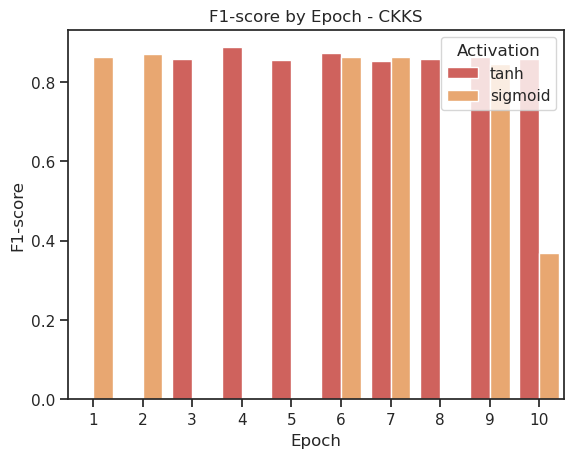

In [33]:
filtered_df = df_metrics[df_metrics['Crypto Scheme'] == 'CKKS']
sns.barplot(data=filtered_df, x='Epochs', hue='Activation', y='F1-score')
plt.title("F1-score by Epoch - CKKS")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

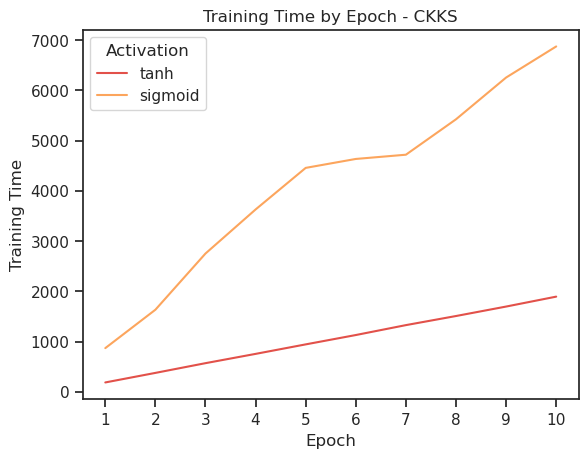

In [28]:
filtered_df = df_metrics[df_metrics['Crypto Scheme'] == 'CKKS']
sns.lineplot(data=filtered_df, x='Epochs', hue='Activation', y='Training Time')
plt.title("Training Time by Epoch - CKKS")
plt.xlabel("Epoch")
plt.ylabel("Training Time")
plt.xticks(range(1, 11))
plt.show()

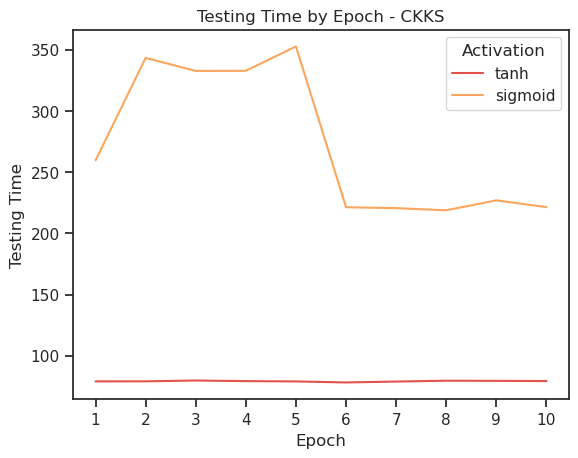

In [29]:
filtered_df = df_metrics[df_metrics['Crypto Scheme'] == 'CKKS']
sns.lineplot(data=filtered_df, x='Epochs', hue='Activation', y='Testing Time')
plt.title("Testing Time by Epoch - CKKS")
plt.xlabel("Epoch")
plt.ylabel("Testing Time")
plt.xticks(range(1, 11))
plt.show()